In [1]:
    #!pip install --user pandas
#!pip install --user awkward
#pip install --user conda
#conda install --user nb_conda_kernels
#pip install --user pyroot
#!pip install --user tqdm
#pip install --user uproot


In [2]:
import importlib
import os                                                                   
from importlib import reload
#import pandas as pd
import os, sys, glob, warnings, glob
import numpy as np
#import awkward
#from tqdm.notebook import tqdm
from tqdm import tqdm
from optical_sim import*
import matplotlib.pyplot as plt
import uproot as root
from clean_tree import*
#import pandas as pd


: 

In [16]:
class Vector:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def give_perpendicular_vector(self):
        if self.x != 0:
            self.x, self.y, self.z = (-(self.y + self.z)/self.x, 1, 1)
        elif self.y != 0:
            self.x, self.y, self.z = (1, -(self.x + self.z)/self.y, 1)
        elif self.z != 0:
            self.x, self.y, self.z = (1, 1, -(self.x + self.y)/self.z)

def get_cos(v1,focal):
    v1=np.array(v1)
    v2=np.array(focal)
    v= v2 - v1
    v=-v/np.linalg.norm(v)
    vec=Vector(v[0],v[1],v[2])
    vec.give_perpendicular_vector()
    xprime=[vec.x,vec.y,vec.z]
    yprime= np.cross(v,xprime)
    return xprime/np.linalg.norm(xprime),yprime/np.linalg.norm(yprime)
def write_macro(pos,ang_x,ang_xy):
  L1=["/ds/manager/log routine \n", 
"/ds/manager/verbosity 1\n", 
"/ds/manager/checkoverlap 0\n", 
"/ds/manager/eventcounter 1000\n", 
"/ds/manager/writephotons 1\n", 
"/ds/manager/writedeposits 0\n", 
"/ds/manager/writedaughters 0\n", 
"/ds/detector/configuration ds20k\n", 
"/run/filename cone_cor3\n", 
"/run/heprandomseed 12345679\n", 
"/ds/physics/hadronic_list none\n", 
"/ds/physics/em_list livermore\n", 
"/ds/physics/killS2 1\n",
"/run/initialize \n",
"/ds/generator/select G4Gun\n",
"/gps/particle opticalphoton\n",
"/gps/energy 2.9 eV\n",
"/gps/ang/type iso\n"]
  DATA_DIR="/home/DARKSIDE/amorsy/storage/g4ds11/analysis_data"
  file =open(f"{DATA_DIR}/script_gen.mac","w")
  file.writelines(L1)
  file.write(f"/gps/position" + " " + "{} {} {} cm \n".format(pos[0],pos[1],pos[2]))
  file.write(f"/gps/ang/rot1" + " " + "{} {} {}  \n".format(ang_x[0],ang_x[1],ang_x[2]))
  file.write(f"/gps/ang/rot2" + " " + "{} {} {} \n".format(ang_xy[0],ang_xy[1],ang_xy[2]))
  file.write("/gps/ang/maxtheta 10.88224797841 deg \n")
  file.write("/run/beamOn 1000000\n")
  file.close()

: 

In [19]:
cor1= [-75,175,182],   [75,-75,-182]
cor3= [175,75,182],   [-75,-75,-182]
cor5= [75,-175,182],  [-75,75,-182]
cor7= [-175,-75,182], [75,75,-182]

DATA_DIR="/home/DARKSIDE/amorsy/storage/g4ds11/analysis_data"
ang_x, ang_xy= get_cos([-75,175,182],   [75,-75,-182])
write_macro([-75,175,182], ang_x, ang_xy)

: 

In [3]:
import os                                                                   
import glob
DATA_DIR="/home/DARKSIDE/amorsy/storage/g4ds11/analysis_data/tilt22/"                                                               
data=CombineAllRuns(DATA_DIR)


Using file:  /home/DARKSIDE/amorsy/storage/g4ds11/analysis_data/tilt22/g4ds_cor3.root
More than one key in the file
['dstree;2', 'dstree;1']
Indices with length > 1:  [51058, 335184, 600671, 751364]
Addons needed:  4
New length:  1000004


/storage/gpfs_ds50/darkside/users/amorsy/g4ds11/clean_tree.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(branches, ignore_index=True)


Using file:  /home/DARKSIDE/amorsy/storage/g4ds11/analysis_data/tilt22/g4ds_cor1.root
More than one key in the file
['dstree;2', 'dstree;1']
Indices with length > 1:  [137787, 185670, 372835, 508368, 606937, 733076, 744400, 934744]
Addons needed:  10
New length:  1000010
Using file:  /home/DARKSIDE/amorsy/storage/g4ds11/analysis_data/tilt22/g4ds_cor7.root
More than one key in the file
['dstree;2', 'dstree;1']
Indices with length > 1:  [114607, 222123, 338746, 807938, 838258, 936188, 986533]
Addons needed:  10
New length:  1000010
Using file:  /home/DARKSIDE/amorsy/storage/g4ds11/analysis_data/tilt22/g4ds_cor5.root
More than one key in the file
['dstree;2', 'dstree;1']
Indices with length > 1:  [132416, 247835, 545981, 734189, 924071]
Addons needed:  5
New length:  1000005


Text(0, 0.5, 'Y [cm]')

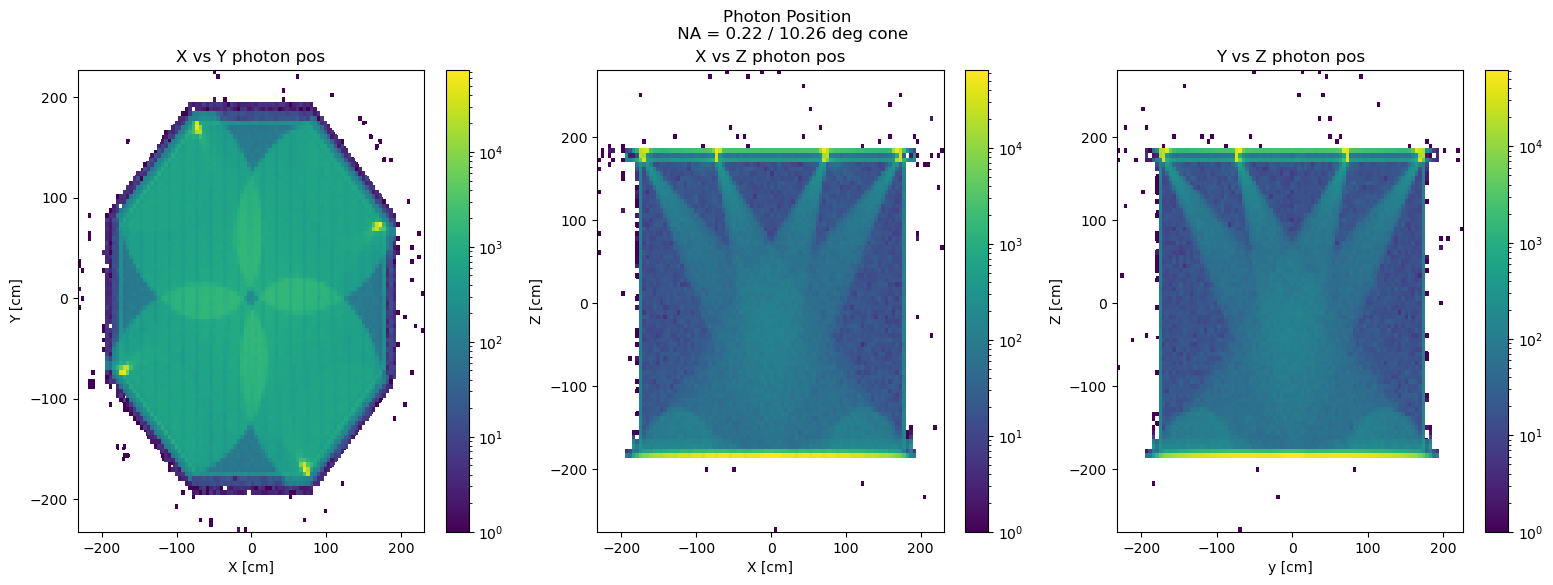

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
dt=data
top_cut=(dt["pe_pmt"] != -1) & (dt["ph_z"] > 0) & (dt["ph_volume"] ==56)
bot_cut=(dt["pe_pmt"] != -1) & (dt["ph_z"] < 0) & (dt["ph_volume"] ==56)

fig, axs = plt.subplots(1, 3, figsize=(19,6))
fig.suptitle('Photon Position \n NA = 0.22 / 10.26 deg cone')
#NA = 0.5 / 23.882247 deg cone
#NA = 22 / 10.2613022 deg cone'

axs[0].hist2d(dt["ph_x"],dt["ph_y"], bins=(100, 100), range=((-180, 180), (-180, 180)), norm=colors.LogNorm())
axs[1].hist2d(dt["ph_x"],dt["ph_z"], bins=(100, 100), range=((-180, 180), (-180, 180)), norm=colors.LogNorm())
axs[2].hist2d(dt["ph_y"],dt["ph_z"], bins=(100, 100), range=((-180, 180), (-180, 180)), norm=colors.LogNorm())
h = axs[1].hist2d(dt["ph_x"], dt["ph_z"], bins=100, norm=colors.LogNorm())
h2 = axs[0].hist2d(dt["ph_x"], dt["ph_y"], bins=100, norm=colors.LogNorm())
h3 = axs[2].hist2d(dt["ph_y"], dt["ph_z"], bins=100, norm=colors.LogNorm())
fig.colorbar(h[3], ax=axs[1])
fig.colorbar(h3[3], ax=axs[2])
fig.colorbar(h2[3], ax=axs[0])



axs[0].set_title("X vs Y photon pos")
axs[1].set_title("X vs Z photon pos")
axs[2].set_title("Y vs Z photon pos")

axs[1].set_xlabel('X [cm]')
axs[1].set_ylabel('Z [cm]')

axs[2].set_xlabel('y [cm]')
axs[2].set_ylabel('Z [cm]')

axs[0].set_xlabel('X [cm]')

axs[0].set_ylabel('Y [cm]')

Text(0.5, 1.0, 'X VS Y pe producing photons Top OP')

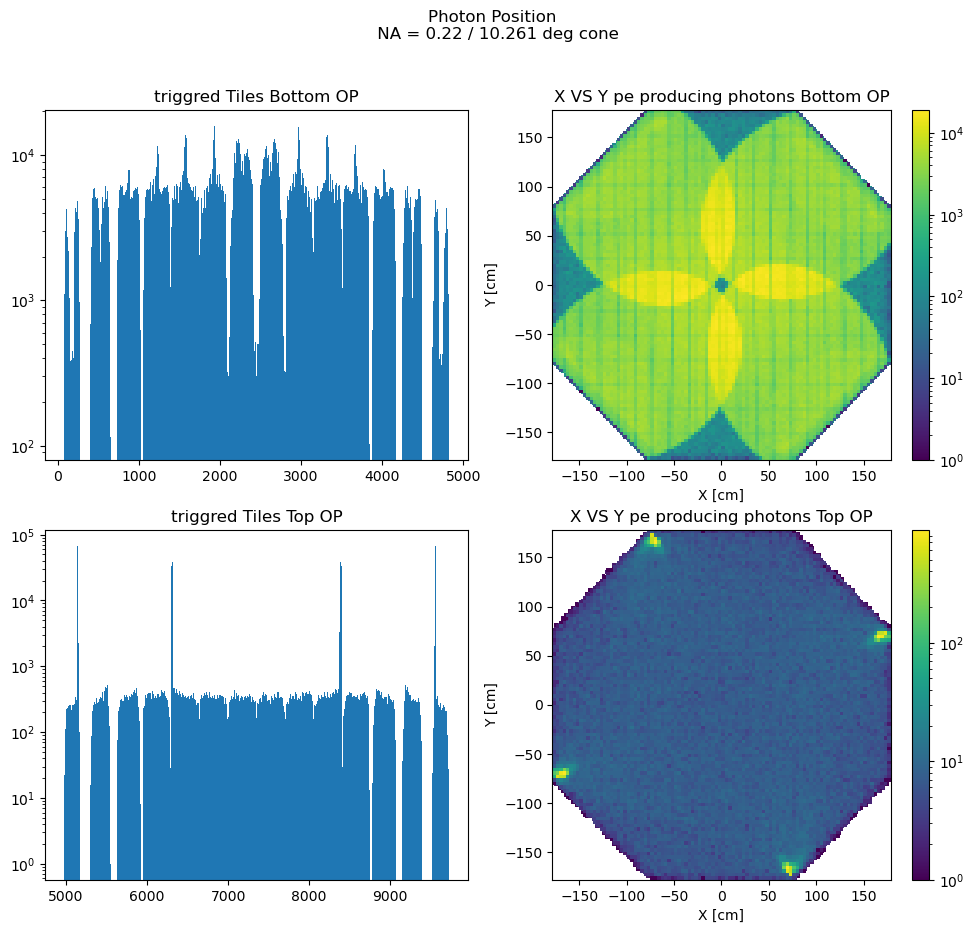

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('Photon Position \n NA = 0.22 / 10.261 deg cone')
#NA = 0.5 / 23.882247 deg cone
#NA = 22 / 10.2613022 deg cone'
top_cut=(dt["pe_pmt"] != -1) & (dt["ph_z"] > 0) & (dt["ph_volume"] ==56)
bot_cut=(dt["pe_pmt"] != -1) & (dt["ph_z"] < 0) & (dt["ph_volume"] ==56)
axs[0][1].hist2d(dt["ph_x"].loc[bot_cut],dt["ph_y"].loc[bot_cut], bins=(100, 100), range=((-180, 180), (-180, 180)), norm=colors.LogNorm())
axs[1][1].hist2d(dt["ph_x"].loc[top_cut],dt["ph_y"].loc[top_cut], bins=(100, 100), range=((-180, 180), (-180, 180)), norm=colors.LogNorm())

h2 = axs[0][1].hist2d(dt["ph_x"].loc[bot_cut], dt["ph_y"].loc[bot_cut], bins=100, norm=colors.LogNorm())
h3 = axs[1][1].hist2d(dt["ph_x"].loc[top_cut], dt["ph_y"].loc[top_cut], bins=100, norm=colors.LogNorm())
fig.colorbar(h3[3], ax=axs[0][1])
fig.colorbar(h2[3], ax=axs[1][1])

axs[0][0].hist(dt["pe_pmt"].loc[bot_cut], bins=500)
axs[1][0].hist(dt["pe_pmt"].loc[top_cut], bins=500)
axs[1][0].set_yscale("log")
axs[0][0].set_yscale("log")

axs[0][1].set_xlabel('X [cm]')
axs[0][1].set_ylabel('Y [cm]')
axs[1][1].set_xlabel('X [cm]')
axs[1][1].set_ylabel('Y [cm]')


axs[0][0].set_title("triggred Tiles Bottom OP")
axs[1][0].set_title("triggred Tiles Top OP")
axs[0][1].set_title("X VS Y pe producing photons Bottom OP")
axs[1][1].set_title("X VS Y pe producing photons Top OP")

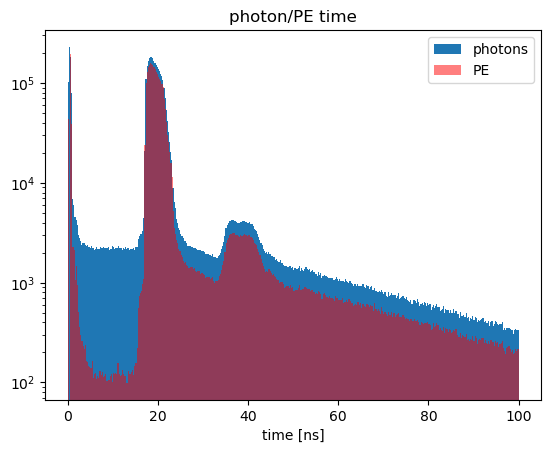

In [11]:
#fig, axs = plt.subplots(1, 2, figsize=(16,8))

#fig.suptitle('triggered tile ID \n NA = 0.5 / 23.882247 deg cone \n Source in NALar')
#NA = 0.5 / 23.882247 deg cone
#NA = 22 / 10.2613022 deg cone'
#position of the bottom optical plane
# z = -182.75
#position of the top optical plane
t_cut=(dt["ph_time"] < 100) 

# z = 182.95
#plt.hist(dt["ph_time"].loc[(dt["ph_volume"]==56) & (dt["ph_z"] < 0) & t_cut],bins=500 , label="bottom Plane")
plt.hist(dt["ph_time"].loc[(t_cut)],bins=400, label="photons")
plt.hist(dt["pe_time"].loc[(t_cut) & (dt["pe_time"] >=0)],bins=400, color="r" ,alpha=0.5, label='PE')

plt.title("photon/PE time")
plt.yscale("log")
plt.xlabel("time [ns]")
#plt.xlim([10,40])
plt.legend()


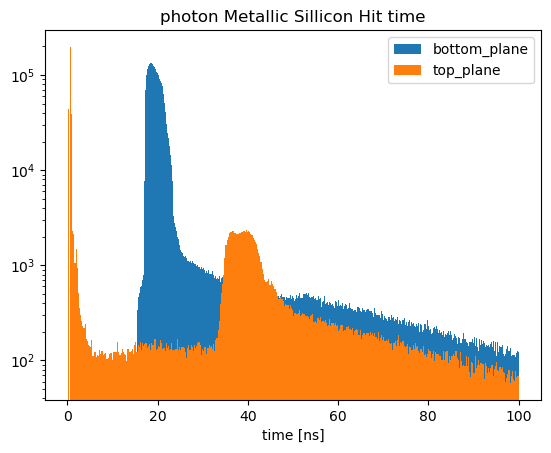

In [16]:
#fig, axs = plt.subplots(1, 2, figsize=(16,8))

#fig.suptitle('triggered tile ID \n NA = 0.5 / 23.882247 deg cone \n Source in NALar')
#NA = 0.5 / 23.882247 deg cone
#NA = 22 / 10.2613022 deg cone'
#position of the bottom optical plane
# z = -182.75
#position of the top optical plane
t_cut=(dt["ph_time"] < 100) 

# z = 182.95
#plt.hist(dt["ph_time"].loc[(dt["ph_volume"]==56) & (dt["ph_z"] < 0) & t_cut],bins=500 , label="bottom Plane")
plt.hist(dt["ph_time"].loc[(t_cut) & (bot_cut)],bins=400, label="bottom_plane")
#plt.hist(dt["pe_time"].loc[(t_cut) & (dt["pe_time"] >=0)],bins=400, color="r" ,alpha=0.5, label='PE')
plt.hist(dt["ph_time"].loc[(t_cut) & ( top_cut)],bins=400, label="top_plane")
plt.title("photon Metallic Sillicon Hit time")
plt.yscale("log")
plt.xlabel("time [ns]")
#plt.xlim([10,40])
plt.legend()


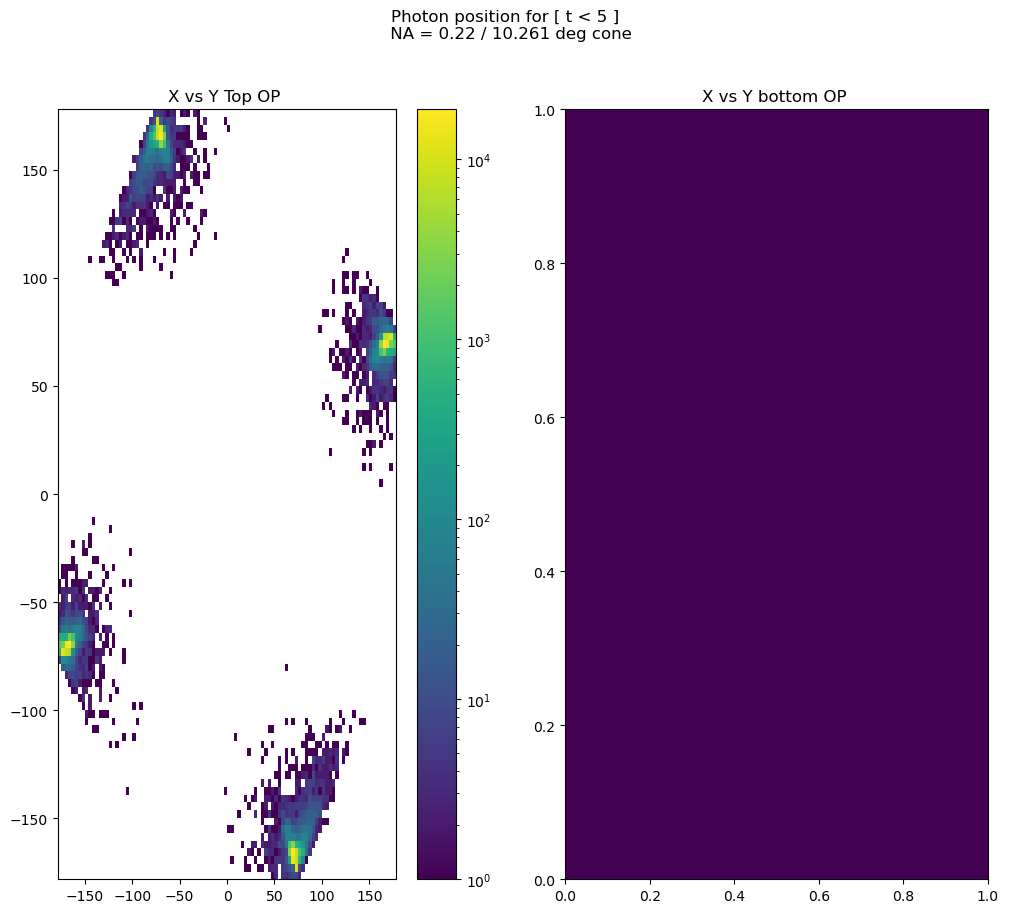

In [13]:
fig, axs = plt.subplots(1,2 , figsize=(12,10))
t_cut=(dt["ph_time"] < 5) 

fig.suptitle('Photon position for [ t < 5 ] \n NA = 0.22 / 10.261 deg cone')
axs[0].hist2d(dt["ph_x"].loc[(top_cut) & t_cut], dt["ph_y"].loc[(top_cut) & t_cut], bins=100, norm=colors.LogNorm())
axs[1].hist2d(dt["ph_x"].loc[(bot_cut) & t_cut], dt["ph_y"].loc[(bot_cut) & t_cut], bins=100, norm=colors.LogNorm())


axs[0].set_title("X vs Y Top OP ")
axs[1].set_title("X vs Y bottom OP ")
h2 = axs[0].hist2d(dt["ph_x"].loc[(top_cut) & t_cut], dt["ph_y"].loc[(top_cut) & t_cut ], bins=100, norm=colors.LogNorm())
#h3 = axs[1].hist2d(dt["ph_x"].loc[(bot_cut) & t_cut], dt["ph_y"].loc[(bot_cut) & t_cut], bins=100, norm=colors.LogNorm())
#fig.colorbar(h3[3], ax=axs[1])
fig.colorbar(h2[3], ax=axs[0])

In [14]:
def main2(data):

    ### Now we have imported the raw data of interest into a df
    ### Now add cuts and make plots
    # First make basic plots (no cuts)
    bottom_plane = (data['ph_z'] > -195) & (data['ph_z'] < -175) & (data['ph_volume'] == sipmVol)
    top_plane = (data['ph_z'] > 175) & (data['ph_z'] < 195) & (data['ph_volume'] == sipmVol)

    bottom_hist, xedges, yedges = np.histogram2d(data['ph_x'][bottom_plane], data['ph_y'][bottom_plane], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    top_hist, xedges, yedges = np.histogram2d(data['ph_x'][top_plane], data['ph_y'][top_plane], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    plt.figure()
    Plot_all(bottom_hist, top_hist)
    PlotTimes(data['ph_time'], data['pe_time'])
    ## Now add cuts
    bounce1 = (data['ph_time'] > 13) & (data['ph_time'] < 17)
    bounce1pe = (data['pe_time'] > 13) & (data['pe_time'] < 17)
    bounce2 = (data['ph_time'] > 29) & (data['ph_time'] < 35)
    bounce2pe = (data['pe_time'] > 29) & (data['pe_time'] < 35)
    bounce3 = (data['ph_time'] > 42) & (data['ph_time'] < 51)
    bounce3pe = (data['pe_time'] > 42) & (data['pe_time'] < 51)
    bounce4 = (data['ph_time'] > 61) & (data['ph_time'] < 68)
    bounce4pe = (data['pe_time'] > 61) & (data['pe_time'] < 68)
    bounce5 = (data['ph_time'] > 75) & (data['ph_time'] < 85)
    bounce5pe = (data['pe_time'] > 75) & (data['pe_time'] < 85)
    bb1 = (data['ph_time'] > 2) & (data['ph_time'] < 12)
    bb2 = (data['ph_time'] > 18) & (data['ph_time'] < 28)
    bb3 = (data['ph_time'] > 36) & (data['ph_time'] < 41)
    bb4 = (data['ph_time'] > 52) & (data['ph_time'] < 60)
    bb5 = (data['ph_time'] > 69) & (data['ph_time'] < 74)
    bounce = bounce1 | bounce2 | bounce3 | bounce4 | bounce5
    bounceb = bounce1 | bounce3 | bounce5
    bouncet = bounce2 | bounce4
    nobounce = bb1 | bb2 | bb3 | bb4 | bb5

    # Plot the bottom and top planes for bounce1
    PlotTimes(data['ph_time'][bounce1], data['pe_time'][bounce1pe], title='-bounce1')
    bottom_hist, xedges, yedges = np.histogram2d(data['ph_x'][bottom_plane & bounce1], data['ph_y'][bottom_plane & bounce1], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    top_hist, xedges, yedges = np.histogram2d(data['ph_x'][top_plane & bounce1], data['ph_y'][top_plane & bounce1], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    PlotPlane(bottom_hist, 'Bottom', title='-bounce1')
    PlotPlane(top_hist, 'Top', title='-bounce1')
    # Plot the bottom and top planes for bounce2
    PlotTimes(data['ph_time'][bounce2], data['pe_time'][bounce2pe], title='-bounce2')
    bottom_hist, xedges, yedges = np.histogram2d(data['ph_x'][bottom_plane & bounce2], data['ph_y'][bottom_plane & bounce2], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    top_hist, xedges, yedges = np.histogram2d(data['ph_x'][top_plane & bounce2], data['ph_y'][top_plane & bounce2], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    PlotPlane(bottom_hist, 'Bottom', title='-bounce2')
    PlotPlane(top_hist, 'Top', title='-bounce2')
    # Plot the bottom and top planes for bounce3
    PlotTimes(data['ph_time'][bounce3], data['pe_time'][bounce3pe], title='-bounce3')
    bottom_hist, xedges, yedges = np.histogram2d(data['ph_x'][bottom_plane & bounce3], data['ph_y'][bottom_plane & bounce3], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    top_hist, xedges, yedges = np.histogram2d(data['ph_x'][top_plane & bounce3], data['ph_y'][top_plane & bounce3], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    PlotPlane(bottom_hist, 'Bottom', title='-bounce3')
    PlotPlane(top_hist, 'Top', title='-bounce3')
    # Plot the bottom and top planes for bounce4
    PlotTimes(data['ph_time'][bounce4], data['pe_time'][bounce4pe], title='-bounce4')
    bottom_hist, xedges, yedges = np.histogram2d(data['ph_x'][bottom_plane & bounce4], data['ph_y'][bottom_plane & bounce4], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    top_hist, xedges, yedges = np.histogram2d(data['ph_x'][top_plane & bounce4], data['ph_y'][top_plane & bounce4], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    PlotPlane(bottom_hist, 'Bottom', title='-bounce4')
    PlotPlane(top_hist, 'Top', title='-bounce4')
    # Plot for between bounces
    PlotTimes(data['ph_time'][nobounce], data['pe_time'][nobounce], title='-nobounce')
    bottom_hist, xedges, yedges = np.histogram2d(data['ph_x'][bottom_plane & nobounce], data['ph_y'][bottom_plane & nobounce], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    top_hist, xedges, yedges = np.histogram2d(data['ph_x'][top_plane & nobounce], data['ph_y'][top_plane & nobounce], bins=(xbin, ybin),
                                    range=((xmin, xmax), (ymin, ymax)))
    PlotPlane(bottom_hist, 'Bottom', title='-nobounce')
    PlotPlane(top_hist, 'Top', title='-nobounce')
    return

main2(data)

<Figure size 640x480 with 0 Axes>

In [10]:
#Detection Rate
# of the photons tha do reach the optical plane how many are detected/trigger a tile 


xyz_05=np.array(NA22["ph_track"][0])
ph_vol=np.array(NA22["ph_volume"])

ind05=NA22["no_trig_ind"]

no_trig_05=xyz_05[ind05]

no_trig_len=len(ind05)
z_cut= -182.75
hit_ind=[]
for z_ind in range(len(xyz_05[:,2])):
    if xyz_05[:,2][z_ind] < 0 and ph_vol[z_ind][0] ==56:
        hit_ind.append(z_ind)

count=0
for i in tqdm(range(len(hit_ind))):
    if hit_ind[i] in ind05:
        count=count+1
eff=count/len(hit_ind)
eff



100%|██████████| 765804/765804 [1:13:32<00:00, 173.54it/s]


0.07422656449953252

In [31]:
nodes, inv, counts = np.unique(xy, return_inverse=True, return_counts=True)
np.max(counts)


4

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys

xyz_22=np.array(NA22["ph_track"][0])
xyz_05=np.array(NA05["ph_track"][0])
ind22=NA22["no_trig_ind"]
ind05=NA05["no_trig_ind"]
no_trig_22=xyz_22[ind22]
no_trig_05=xyz_05[ind05]

fig, axs = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Bottom optical plane at Z = -182.75')

#position of the bottom optical plane
# z = -182.75
#position of the top optical plane
# z = 182.95
z_cut= -182.75


# z position cut to single out either the top plane or the bottom plane 
# photons hitting the plane
ph_x=xyz_05[:,0][xyz_05[:,2] == z_cut]
ph_y=xyz_05[:,1][xyz_05[:,2] == z_cut]


xy=[]
for ind in range(len(ph_x)):
    xy.append([ph_x[ind],ph_y[ind]])
nodes, inv, counts = np.unique(xy, return_inverse=True, return_counts=True)

axs[0].hist2d(ph_x,ph_y, bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())

#photons hitting the plane and not triggering a tile
x_no_tig=xyz_05[:,0][ind05][xyz_05[:,2][ind05] == z_cut]
y_no_tig=xyz_05[:,1][ind05][xyz_05[:,2][ind05] == z_cut]
axs[1].hist2d(x_no_tig,y_no_tig, bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())

# colour bar
axs[0].pcolor(xy,  colorbar='l', extend='max')


axs[0].set_xlabel('X [cm]')
axs[0].set_ylabel('Y [cm]')
axs[0].set_title('Y vs X for the photons with NA=05')

axs[1].set_xlabel('X [cm]')
axs[1].set_ylabel('Y [cm]')
axs[1].set_title('Photons that didnt trigger a tile for NA=05')



plt.show()




: 

: 

: 

In [ ]:
axs[2].plt.hist2d(xyz_05[0],xyz_05[1],bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())
axs[3].plt.hist2d(xyz_05[0][ind05],xyz_05[1][ind05],bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())

axs[2].set_xlabel('X [cm]')
axs[2].set_ylabel('Y [cm]')
axs[2].set_title('Y vs X for the photons with NA=0.5')

axs[3].set_xlabel('X [cm]')
axs[3].set_ylabel('Y [cm]')
axs[3].set_title('Photons that didnt trigger a tile for NA=0.5')

In [18]:
cha=[]
for ind in tile_ch:
    if len(ind) >0:
        if ind[0] >= 4500:
            cha.append(ind[0])
nodes, inv, counts = np.unique(cha, return_inverse=True, return_counts=True)

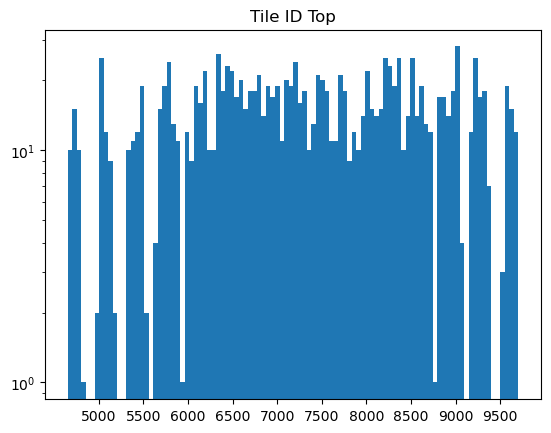

In [28]:
plt.hist(cha, bins=100)
plt.xticks([5000,5500,6000,6500,7000,7500,8000,8500,9000,9500])
plt.title("Tile ID Top")
plt.yscale("log")

In [32]:
np.array(tree['ph_x'])[1][0]

106.869255

In [33]:
def clean_tree(filename):
    file= root.open(filename[0])
    tree    = file["dstree"]
    
    ph_z = np.array(tree['ph_z'])
    ph_x = np.array(tree['ph_x'])
    ph_y = np.array(tree['ph_y'])
    ph_time =np.array(tree['ph_time'])
    tl_y =np.array(tree['tile_y'])
    tl_x =np.array(tree['tile_x'])
    npe =np.array(tree['npe'])
    s1npe =np.array(tree['s1npe'])
    tl_s1npe =np.array(tree['tile_s1npe'])
    tl_s1max=np.array(tree['tile_s1max'])

    
    px=[x for x in ph_x if x]
    py=[x for x in ph_y if x]
    pz=[x for x in ph_z if x]
    NPE= [npe, s1npe, tl_x,tl_y,tl_s1max,tl_s1npe] 
    NPH= [px, py, pz,ph_time] 
    return NPE,NPH
NPE,NPH = clean_tree(filename)


: 

: 

: 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 103. , 1063.2, 2023.4, 2983.6, 3943.8, 4904. , 5864.2, 6824.4,
        7784.6, 8744.8, 9705. ]),
 <a list of 5000 BarContainer objects>)

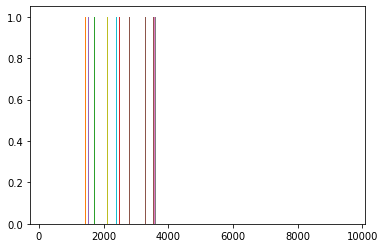

In [4]:
file= root.open(filename[0])
tree    = file["dstree"]
npe = np.array(tree['pe_pmt'])
plt.hist(npe[:5000])

In [4]:
count=0
file= root.open(filename[0])
tree    = file["dstree"]
ph_vol = np.array(tree['ph_volume'])
for ind in ph_vol:
    for j in ind:
        if j == 56:
            count = count+1
print(count)

10000000

: 

AttributeError: 'numpy.ndarray' object has no attribute 'hist2d'

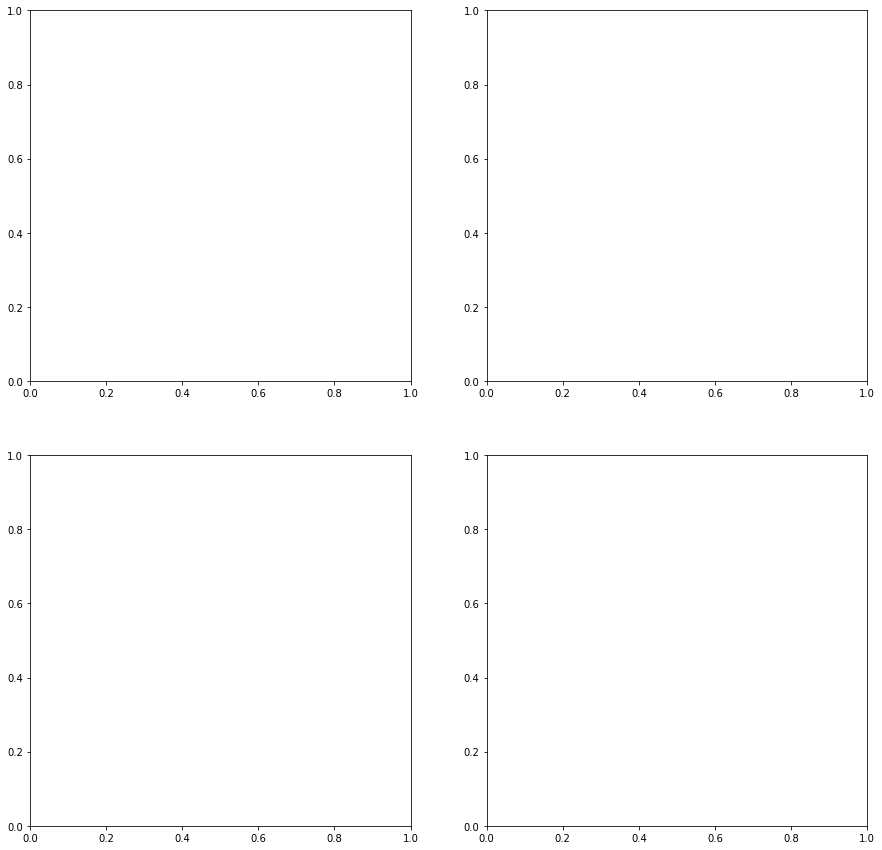

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sys

px,py,pz,time =clean_tree(filename)
fig, axs = plt.subplots(2,2, figsize=(15, 15))
axs[0].hist2d(px, pz, bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())
axs[0].colorbar()
axs[0].set_xlabel('X [cm]')
axs[0].set_ylabel('Z [cm]')
axs[0].set_title('X vs Z for the photons')

axs[1].hist2d(py, pz, bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())
axs[1].colorbar()
axs[1].set_xlabel('Y [cm]')
axs[1].set_ylabel('Z [cm]')
axs[1].set_title('Y vs Z for the photons')

axs[2].hist2d(px, py, bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())
axs[2].colorbar()
axs[2].set_xlabel('X [cm]')
axs[2].set_ylabel('Y [cm]')
axs[2].set_title('X vs Y for the photons')

#plt.hist(time, 
#         bins=400, range=(0, 100))
#plt.xlabel('Time [ns(?)]')
#plt.ylabel('Number of photons')
## make the y axis log scale
#plt.yscale('log')
# plt.xscale('log')
#plt.title('Time of the photons')

Text(0.5, 1.0, 'X vs Z for the photons')

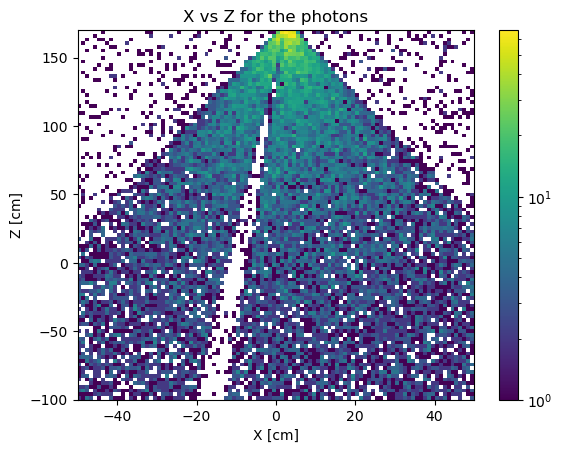

In [38]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sys
plt.hist2d(xyz_05[:,0], xyz_05[:,2], bins=(100, 100), range=((-50, 50), (-100, 170)), norm=colors.LogNorm())
plt.colorbar()
plt.xlabel('X [cm]')
plt.ylabel('Z [cm]')
plt.title('X vs Z for the photons')

In [18]:
ph_x[:,0]

<Array [35.2, 2.45, 10.1, ... -81.1, 19.1] type='1000000 * float32'>

In [19]:
file= root.open(filename[0])
tree    = file["dstree"]

ph_z = np.array(tree['ph_z'])
ph_x = np.array(tree['ph_x'])
ph_y = np.array(tree['ph_y'])
px=[x for x in ph_x if x]
py=[x for x in ph_y if x]
pz=[x for x in ph_z if x]
plt.hist2d(py, pz, bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())
plt.colorbar()
plt.xlabel('Y [cm]')
plt.ylabel('Z [cm]')
plt.title('Y vs Z for the photons')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [27]:
tree['ph_x'].array()

<Array [[91.3], [107], ... [-111], [12.4]] type='6461260 * var * float32'>

ValueError: in ListOffsetArray64, cannot convert to RegularArray because subarray lengths are not regular

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.1/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

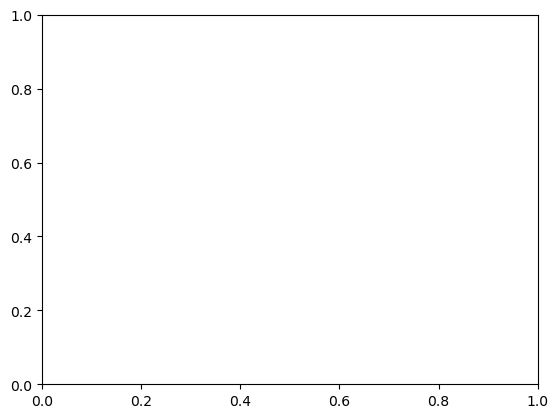

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sys
ph_z = tree['ph_z'].array()
ph_x = tree['ph_x'].array()
ph_y = tree['ph_y'].array()
plt.hist2d(ph_x, ph_y, bins=(100, 100), range=((-200, 200), (-200, 200)), norm=colors.LogNorm())
# plt.hist2d(branches['ph_x'][pass_cut], branches['ph_y'][pass_cut], bins=(100, 100), range=((-100, 100), (-100, 100)))
plt.colorbar()
plt.xlabel('X [cm]')
plt.ylabel('Y [cm]')
plt.title('Y vs X for the photons')

In [14]:
file= root.open(filename[1])
dsreco    = file["dstree"]
dsreco.keys()

['slice_id',
 'pulse_id',
 'charge',
 'start',
 'nsamples',
 'fprompt',
 'nzles',
 'zles_sample',
 'zles_channel',
 'zles_length',
 'zles_integral',
 'zles_nhits',
 'nhits',
 'hits_sample',
 'hits_channel',
 'hits_max',
 'hits_integral',
 'hits_zle_id']

SyntaxError: invalid syntax (<ipython-input-56-c482ced0b689>, line 4)

In [ ]:
def Hit(pos):
    final=pos[:2]
    plt.plot(final, color="black", linewidth=1,label="photon track")
    plt.xlabel("x [cm]")
    plt.xlabel("y [cm]")